## Decision Tree Model

In this we use Kyphosis data form kaggle and predict if Kyphosis is present or not using decision tree model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
kyphosis = pd.read_csv('kyphosis.csv')

In [3]:
kyphosis.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
kyphosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
kyphosis.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [6]:
X = kyphosis.drop('Kyphosis', axis = 1)

In [7]:
y = kyphosis['Kyphosis']

### Modelling 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

### Evaluating the model

In [10]:
predictions = dtree.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
confusion_matrix(y_test, predictions)

array([[16,  3],
       [ 4,  2]], dtype=int64)

In [13]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.80      0.84      0.82        19
     present       0.40      0.33      0.36         6

    accuracy                           0.72        25
   macro avg       0.60      0.59      0.59        25
weighted avg       0.70      0.72      0.71        25



### DecisionTree visualisation 

In [14]:
classes = list(y_train.unique())

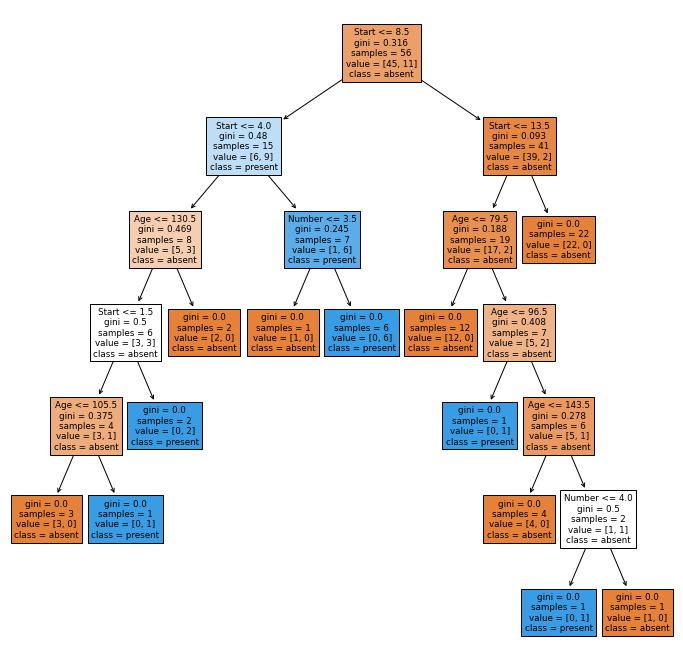

In [15]:
from sklearn import tree
plt.figure(figsize = (12, 12))
_ = tree.plot_tree(dtree, feature_names = list(X_train.columns), class_names = classes, filled = True)

### Random Forests

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
rfc_pred = rfc.predict(X_test)

In [21]:
print(confusion_matrix(y_test, rfc_pred))

[[19  0]
 [ 5  1]]


In [22]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25

